# Задание

Выполнил: Киселев Владимир

Дата: 06.07.2023

v1.kiselev@yandex.ru

Требуется:


- [X] провести разведочный анализ данных
- [X] выбрать критерий для точности модели
- [X] указать степень важности (информативности) каждой из 10 входных переменных с точки зрения точности модели

- [X] Дополнительно: Что еще можно предложить чтобы улучшить получившийся результат?

---

# Импорты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

STATE = 12345

---

In [2]:
# читаем данные и сразу размечаем таргеты и фичи 
# присваиваем фичам значения X_n, X_n+1 и тд, тергет - Y

data = pd.read_csv(r'C:\Users\vk\python\test_task\preliminary_task.txt', sep='\t',
                   names=['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'Y'])

# поделил их заранее спеицально, чтобы удобнее было проводить EDA

features = data.drop(columns = ['Y'])
target = data['Y']

# EDA (разведочный анализ данных)

In [3]:
# выводим первые 10 строк датафрейма, чтобы ознакомиться с данным

data.head(10)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,Y
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20
5,0.538797,0.088621,0.886119,0.781848,0.401623,0.207652,0.946310,0.769453,0.827292,0.937183,15
6,0.206888,0.948597,0.558884,0.871703,0.465946,0.276475,0.989965,0.704521,0.274629,0.632537,17
7,0.187104,0.958926,0.333785,0.553103,0.321272,0.093246,0.992068,0.683878,0.826543,0.339985,14
8,0.779970,0.733282,0.640320,0.988489,0.503198,0.283350,0.412005,0.655302,0.025155,0.120866,23
9,0.193944,0.810933,0.444994,0.330572,0.518216,0.845187,0.525841,0.713356,0.666183,0.856873,11


In [4]:
# выводим информацию по датафрейму

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     1000 non-null   float64
 1   X_2     1000 non-null   float64
 2   X_3     1000 non-null   float64
 3   X_4     1000 non-null   float64
 4   X_5     1000 non-null   float64
 5   X_6     1000 non-null   float64
 6   X_7     1000 non-null   float64
 7   X_8     1000 non-null   float64
 8   X_9     1000 non-null   float64
 9   X_10    1000 non-null   float64
 10  Y       1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
# проверяем на наличие дубликатов

data.duplicated().sum()

0

In [6]:
# выводим описательные статистики

data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490491,0.499785,0.496466,0.503167,0.508902,0.513466,0.487111,0.498870,0.505611,0.499113,15.014000
std,0.293920,0.278833,0.298024,0.284102,0.283300,0.291059,0.288407,0.285954,0.283131,0.284073,4.771223
min,0.000188,0.000085,0.003110,0.001223,0.005314,0.000517,0.000493,0.000408,0.007883,0.000170,3.000000
25%,0.218825,0.262168,0.231492,0.268925,0.274572,0.255524,0.237778,0.256103,0.262332,0.249675,12.000000
50%,0.504439,0.500901,0.484347,0.503412,0.508629,0.527155,0.475274,0.501300,0.518847,0.509422,15.000000
75%,0.738004,0.734516,0.764729,0.747587,0.742461,0.766870,0.738885,0.736849,0.748473,0.741870,18.000000
max,0.999566,0.999959,0.998918,0.998785,0.998478,0.999059,0.999179,0.998646,0.998884,0.998819,29.000000


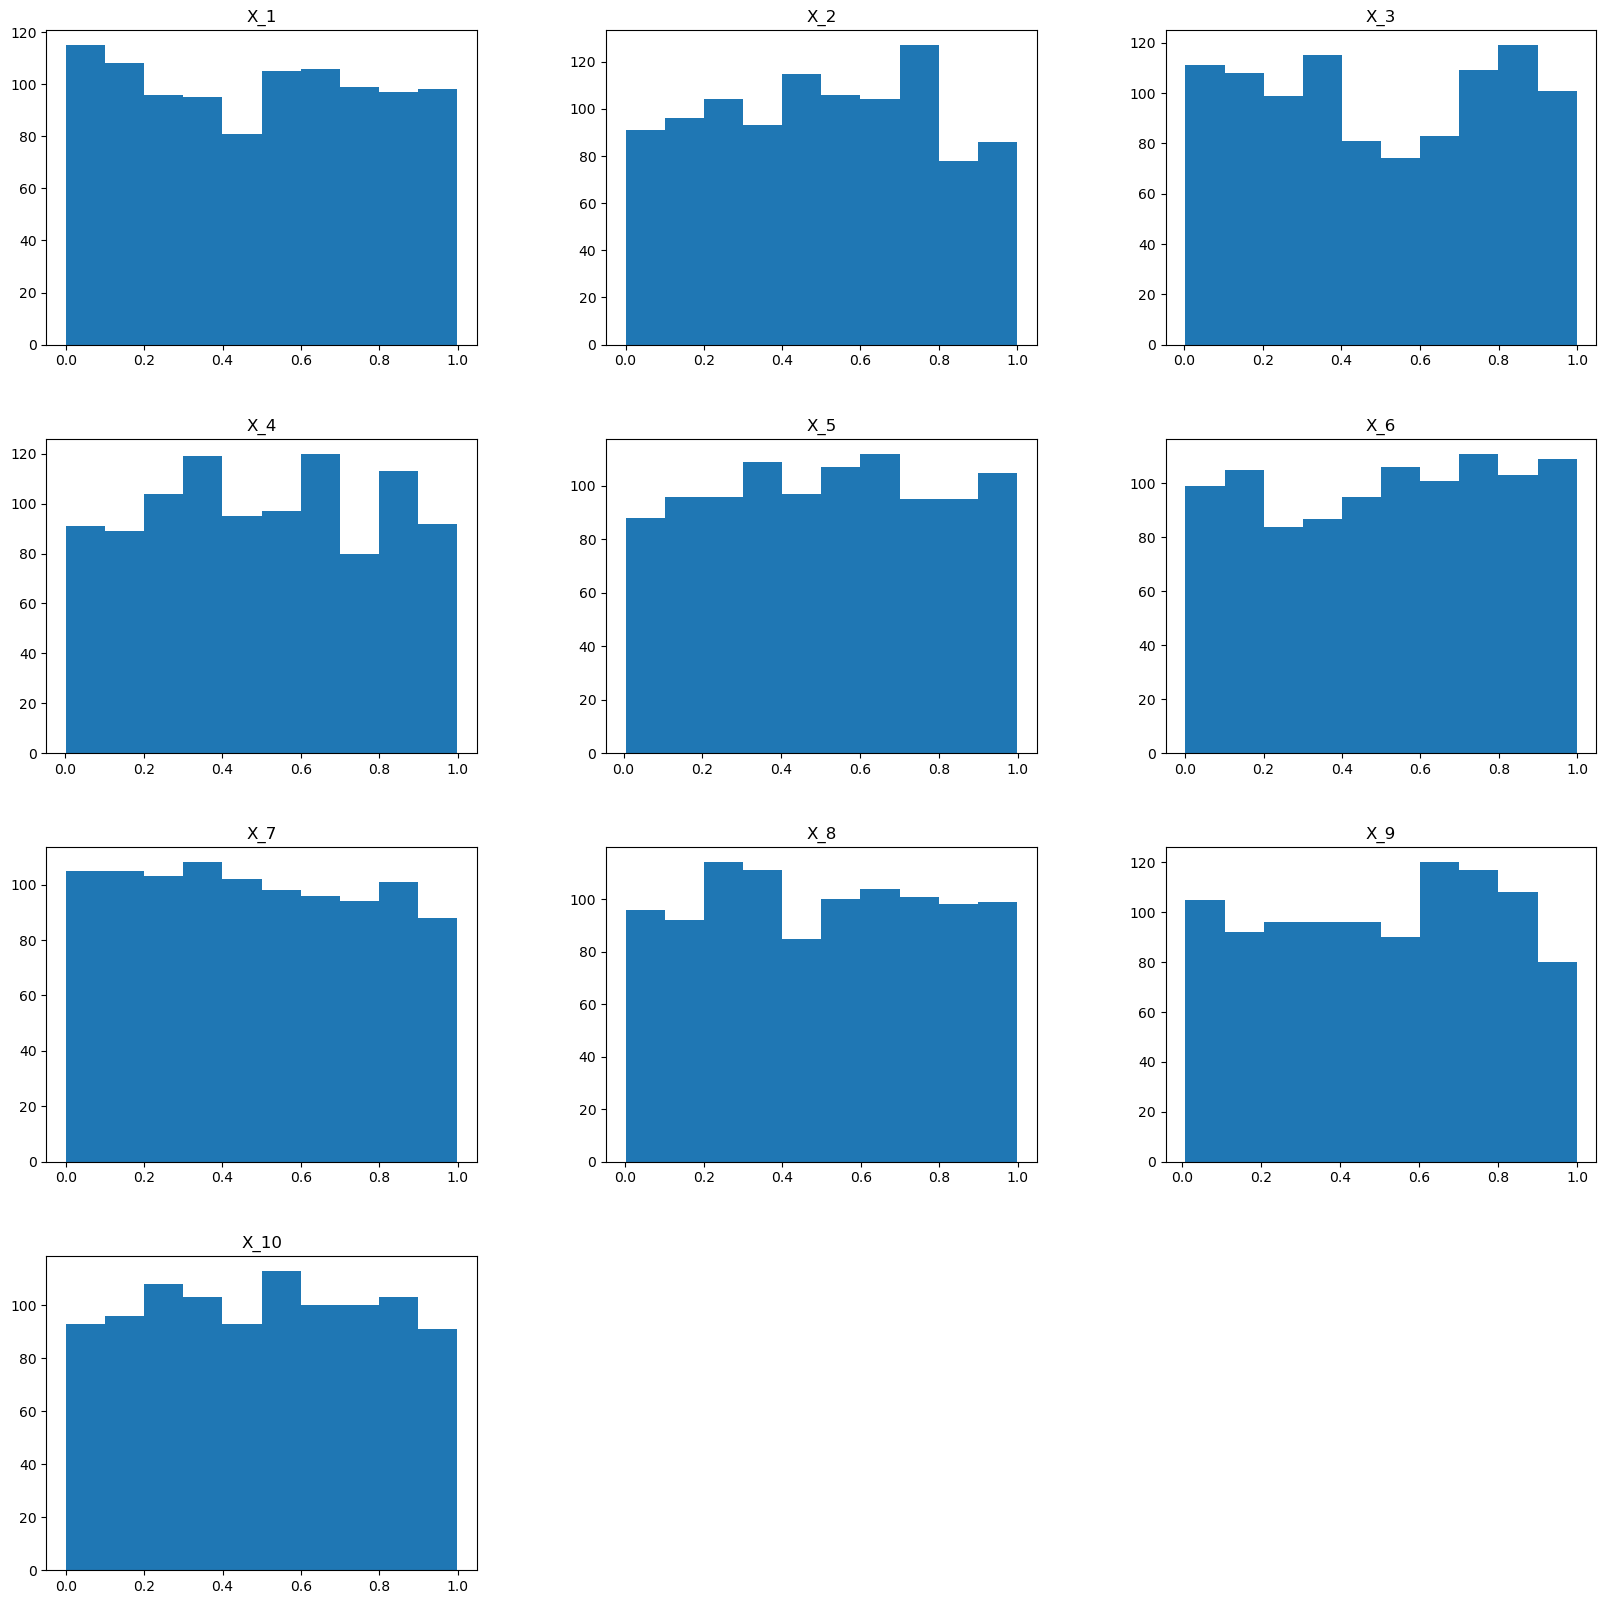

In [7]:
# строим гистограммы фичей, чтобы посмотреть на их распределение,
# заранее можно предположить, что фичи стандартизированы, так как их значения
# варьируются от 0 до 1

features.hist(grid=False, figsize=(20,20));

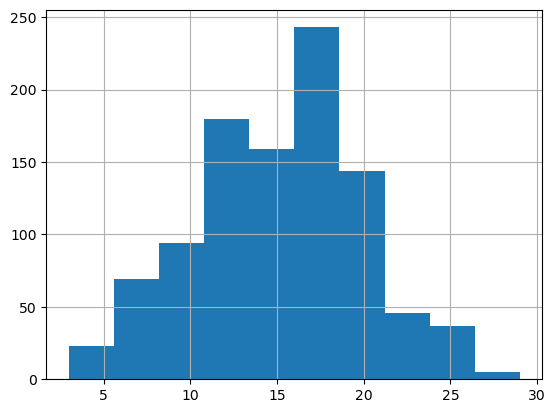

In [8]:
# выводим гистограмму таргета

target.hist();

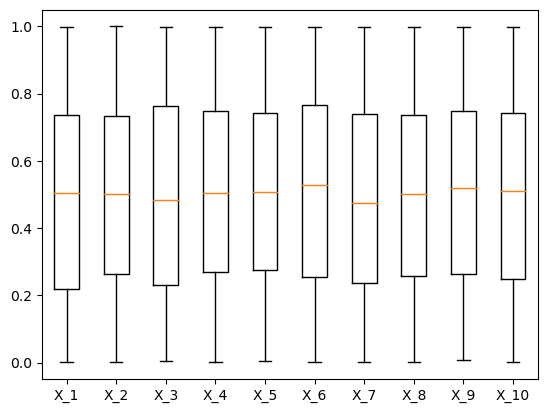

In [9]:
# выводим диаграммы размаха для фичей

plt.boxplot(features, labels=['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']);

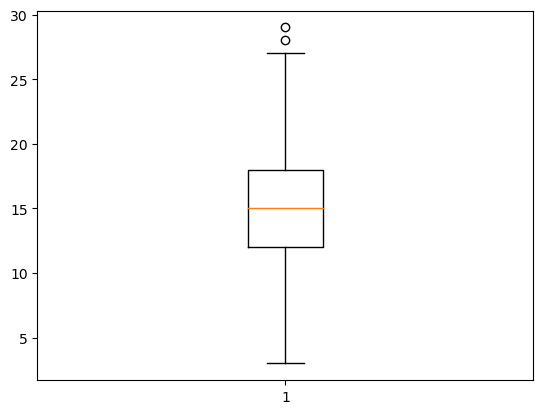

In [10]:
# диаграмма размаха таргета

plt.boxplot(target);

In [11]:
# корреляционная матрица

data.corr().round(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,Y
X_1,1.00,-0.03,0.00,-0.02,0.01,-0.01,-0.03,0.01,-0.01,-0.01,0.43
X_2,-0.03,1.00,0.00,0.02,-0.06,-0.02,-0.02,0.01,0.03,-0.05,0.37
X_3,0.00,0.00,1.00,0.03,-0.04,0.02,0.02,0.06,0.01,0.01,-0.01
X_4,-0.02,0.02,0.03,1.00,-0.06,-0.02,0.00,-0.01,0.00,-0.04,0.56
X_5,0.01,-0.06,-0.04,-0.06,1.00,0.05,0.02,0.01,-0.05,0.02,0.25
X_6,-0.01,-0.02,0.02,-0.02,0.05,1.00,-0.04,-0.02,-0.05,-0.01,-0.01
X_7,-0.03,-0.02,0.02,0.00,0.02,-0.04,1.00,0.01,0.10,0.01,-0.03
X_8,0.01,0.01,0.06,-0.01,0.01,-0.02,0.01,1.00,0.00,0.05,0.00
X_9,-0.01,0.03,0.01,0.00,-0.05,-0.05,0.10,0.00,1.00,-0.02,-0.02
X_10,-0.01,-0.05,0.01,-0.04,0.02,-0.01,0.01,0.05,-0.02,1.00,-0.06


## Вывод

- В данных отсутствуют пропуски;
- Типы данных приведены;
- Отсутствуют дубликаты;
- Фичи уже стандартизированы, так как их значения варьируются от 0 до 1;
- Большее количество значений целевого признака находятся в промежутке значений от 11 до 21;
- На диаграммах размаха фичей выбросов не было замечено;
- На диаграмме таргета замечены выбросы, однако их не так много чтобы удалять 2 строки, к тому же их значение не является аномальным;
- Корреляционная матрица показывает, что большее влияние на таргет оказывают следующие фичи: X_1, X_2, X_4, X_5;

# Обучение модели регрессии

In [12]:
# делим фичи и таргет на тестовую и обучающую выборки

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state = STATE)

print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(800, 10) (800,)
(200, 10) (200,)


In [13]:
# обучаем модель Линейной Регрессии без подбора параметров и тд

model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [14]:
# выводим предсказания обученной модели

target_pred = model.predict(features_test)
print(target_pred[:10])

[13.01304213 14.01744245 13.46715271 15.32447238 20.74683438  8.18638167
 15.23602973 18.65633715 10.01251354 14.72575297]


In [15]:
# расчитываем MAE и R^2

mae = np.round(np.sqrt(metrics.mean_absolute_error(target_test, target_pred)), 3)
r2 = np.round(metrics.r2_score(target_test, target_pred), 3)

In [16]:
print('Mean Absolute Error (MAE):', mae)
print('R2:', r2)

Mean Absolute Error (MAE): 1.395
R2: 0.722


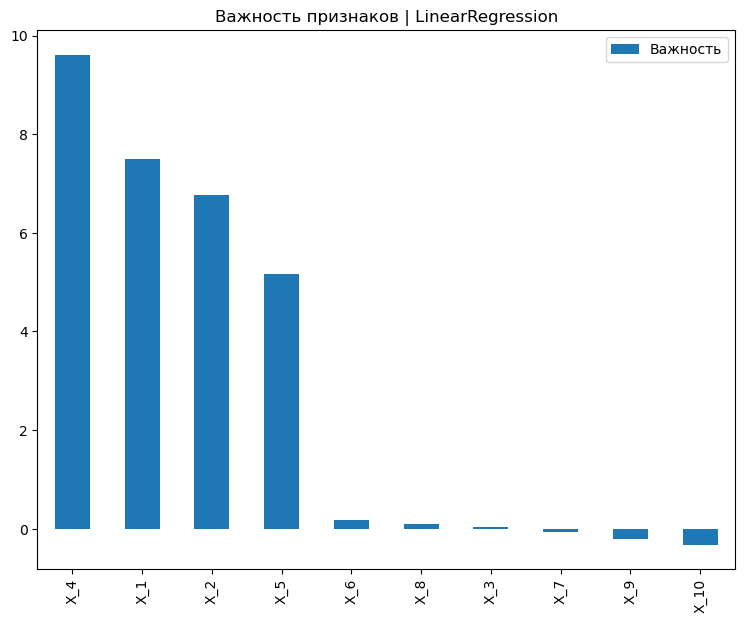

In [17]:
# выводим график важности факторов

importance = pd.DataFrame(model.coef_, columns=["Важность"], index=features_train.columns)

importance = importance.sort_values(by='Важность', ascending=False)

importance.plot(kind="bar", figsize=(9, 7), title='Важность признаков | LinearRegression');

## Вывод

- Обучена модель Линейной Регрессии без подбора параметров
- Рассчитаны MAE и R^2 
- По результатам был построен график важности признаков. Из него можно сделать вывод, что наиболее важными и влияющими на таргет являются фичи: X_4, X_1, X_2, X_5. Остальные оказывают малое влияние.

Почему были выбраны именно эти метрики. Средняя абсолютная ошибка (МАЕ) проста в интерпретации. Так как нет условия конкретной задачи, в теории, можно выбрать любой критерий. Если же это была бы задача для оценки, например, стоимости чего-либо или цены, то в таком случае MAE не подошло бы, и я бы рассматривал другую метрику. Так как МАЕ не сильно штрафует ошибки, в то время, как MSE наоборот.


# Как улучшить модель?

Улучшить модель можно с помощью:
1. Сокращения признаков которые не оказывают сильного влияния на таргет
2. Подбора гиперпараметров
3. Добавления новых признаков

*ПС ниже я попробую удалить маловлияющие признаки и посмотрим улучшится ли модель*

In [18]:
# выделяем только наиболее важные фичи

features_best = data.drop(columns = ['Y', 'X_6', 'X_8', 'X_3', 'X_7', 'X_9', 'X_10'])

In [19]:
# опять делим на тестовую и обучающие выборки

features_train_best, features_test_best, target_train, target_test = train_test_split(features_best, target, test_size=0.2, random_state = STATE)

print(features_train_best.shape, target_train.shape)
print(features_test_best.shape, target_test.shape)

(800, 4) (800,)
(200, 4) (200,)


In [20]:
# обучаем модель на новых данных

model = LinearRegression()
model.fit(features_train_best, target_train)

LinearRegression()

In [21]:
# записываем предсказания модели

target_pred_best = model.predict(features_test_best)
print(target_pred_best[:10])

[12.95549973 13.85182298 13.38540048 15.28016167 20.64615396  8.2175094
 15.19589863 18.67539655 10.13711235 14.54286567]


In [22]:
# расчитываем те же метрики для того, чтобы сравнить изменение если оно будет

mae_best = np.round(np.sqrt(metrics.mean_absolute_error(target_test, target_pred_best)), 3)
r2_best = np.round(metrics.r2_score(target_test, target_pred_best), 3)

In [23]:
# создаем словарь со значениям метрик

d = {'MAE': [mae, mae_best],
     'R2': [r2, r2_best],
     'Изменение': [mae-mae_best, r2-r2_best]
    }
results = pd.DataFrame(data=d)
results

,MAE,R2,Изменение
0,1.395,0.722,0.002
1,1.393,0.722,0.000


## Вывод

Удаление маловлияющих признаков улучшило показатель MAE на 0.002, что является малозначимым.

Я буду благодарен, если смогу получить фидбэк по проделанной работе :)